### Gaussian model of shear frame building with 3 floors

### Observing multiple floors

### General Code - can be used with single floor as well

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.stats import gaussian_kde

## First index is floor number and second is PC coefficient
# First floor
u10 = 0.2 # mean
u11 = 0.04 # xi1 
u12 = 0.01 # xi2
u13 = 0.08 # xi1 ^2 - 1
u14 = 0.01 # xi1* xi2
u15 = 0.03 # xi2 ^2 - 1

# Second floor
u20 = 0.3
u21 = 0.02
u22 = 0.02
u23 = 0.02
u24 = 0.01
u25 = 0.04


# Third floor
u30 = 0.4
u31 = 0.03
u32 = 0.02
u33 = 0.01
u34 = 0.02
u35 = 0.01


# np.rng(40)

np.random.seed(31)

nsamp =  1000

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)

U1 = np.zeros((nsamp,1))
U2 = np.zeros((nsamp,1))
U3 = np.zeros((nsamp,1))

# Ucheck = np.zeros((nsamp,1))


U1[:,0] = u10 + u11 *  xi1 + u12 *  xi2  + u13 * (xi1 **2 - 1) + u14 * (xi1 * xi2) + u15 * (xi2 **2 - 1)

# Ucheck[:,0] = u10 + u11 *  xi1 + u12 *  xi2 
# 
U2[:,0] = u20 + u21 *  xi1 + u22 *  xi2  +  u23 * (xi1 **2 - 1) + u24 * (xi1 * xi2) + u25 * (xi2 **2 - 1)
#

U3[:,0] = u30 + u31 *  xi1 + u32 *  xi2  +  u33 * (xi1 **2 - 1) + u34 * (xi1 * xi2) + u35 * (xi2 **2 - 1)
# 


P_k = np.zeros((3,3))

mu1 = np.mean(U1)
var1 = np.var(U1,ddof=1)

mu2 = np.mean(U2)
var2 = np.var(U2,ddof=1)

mu3 = np.mean(U3)
var3 = np.var(U3,ddof=1)


x_k_mean = np.array([[mu1],[mu2],[mu3]])

x_ki = np.array([U1[:,0],U2[:,0],U3[:,0]])

print("x_k_mean is", x_k_mean)

print(x_ki.shape)
# cov12 = np.cov(U1[:,0],U2[:,0])
# cov13 = np.cov(U1[:,0],U3[:,0])
# cov23 = np.cov(U2[:,0],U3[:,0])

# print(cov12)
# print(cov13)
# print(cov23)

data = np.stack((U1[:,0], U2[:,0], U3[:,0]), axis=0)

print(data.shape)

# print(U1[:,0].shape)

P_k = np.cov(data)

print("forecast cov is", P_k)


### Code for checking 

# x16 =  np.linspace(0.0,0.4, 100)

# p16 = norm.pdf(x16, loc= mu1, scale = np.sqrt(P_k[0,0]))

# kde = gaussian_kde(U1[:,0], bw_method='scott')

# kde_values = kde(x16)

# p17 = norm.pdf(x16, loc= mu1, scale = np.sqrt(u11**2 + u12**2))


# plt.figure(i)
# plt.title("Floor 1")
# plt.plot(x16, kde_values, label='KDE')
# # plt.semilogy(x16,p16,label = 'nonlinear')
# plt.plot(x16,p17,label = 'linear')
# plt.legend()
# # plt.savefig('EnKF_floor1-1observed.pdf')
# plt.show()


x_k_mean is [[0.20071453]
 [0.29978048]
 [0.40051461]]
(3, 1000)
(3, 1000)
forecast cov is [[0.01532646 0.00628477 0.00383373]
 [0.00628477 0.00463307 0.00241239]
 [0.00383373 0.00241239 0.00209826]]


H_k is [[1. 0. 0.]
 [0. 1. 0.]]
noise strength is 0.25
epsilon is [[ 2.16493494]
 [-0.99065175]]
perturbation size is (2, 1000)
sample noise covariance is [[ 0.24343201 -0.00103073]
 [-0.00103073  0.00101615]]
sample is [[0.15271966]
 [0.26295231]
 [0.40532564]]
iteration step
 0
d_k is [[0.8], [0.5]]
d_ki is [[1.02562717 0.54912161]
 [1.13262506 0.5106604 ]
 [0.2131924  0.5414122 ]
 ...
 [1.05584788 0.51898943]
 [1.6206189  0.49742821]
 [0.72238571 0.47167511]]
Kalman gain is 
 [[0.03734691 1.07776769]
 [0.00778265 0.81288816]
 [0.00626339 0.42120532]]
(3, 1000)
updated mean is [[0.43968652]
 [0.46771541]
 [0.48887818]]
updated covariance is [[0.00810566 0.00109624 0.00109694]
 [0.00109624 0.00082178 0.00040623]
 [0.00109694 0.00040623 0.00104252]]
updated covariance check is [[0.00798054 0.00105667 0.00109056]
 [0.00105667 0.00081799 0.00042155]
 [0.00109056 0.00042155 0.00105814]]


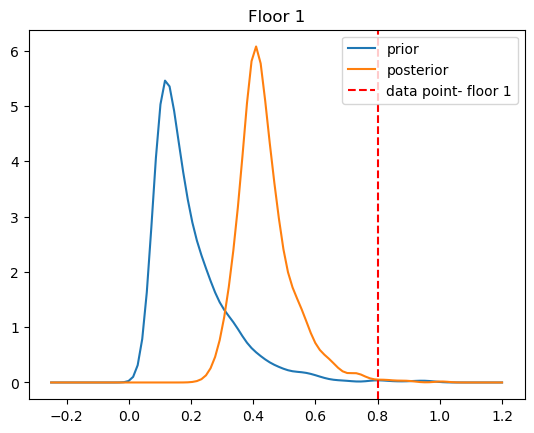

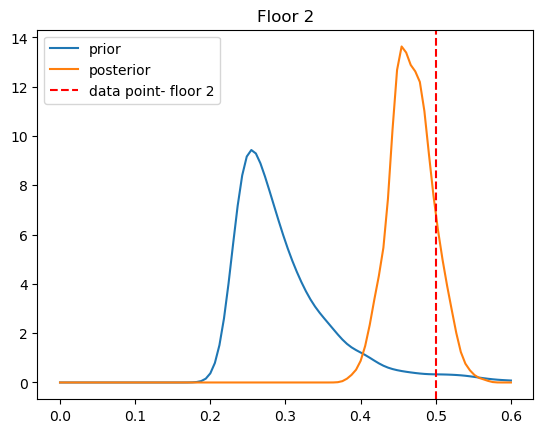

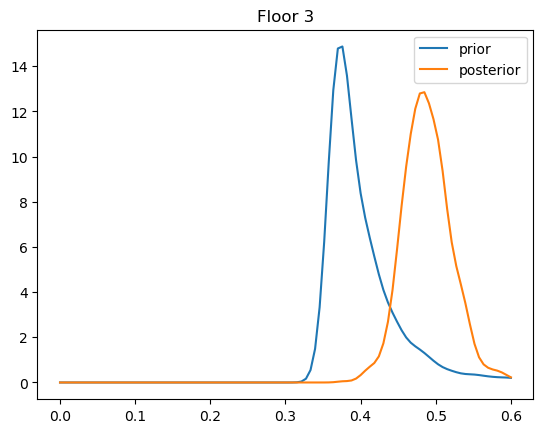

In [2]:
### Ensemble of Data
from scipy.stats import norm

import os

statesize = 3
observed = 2

x1 =  np.linspace(-0.25,1.2, 100)

x2 =  np.linspace(0.0,0.6, 100)

x3 =  np.linspace(0.0,0.6, 100)


kde = gaussian_kde(U1[:,0], bw_method='scott')

kde_floor1 = kde(x1)

kde = gaussian_kde(U2[:,0], bw_method='scott')

kde_floor2 = kde(x2)

kde = gaussian_kde(U3[:,0], bw_method='scott')

kde_floor3 = kde(x3)

# p1 = norm.pdf(x1, loc= mu1, scale = np.sqrt(P_k[0,0]))
# p2 = norm.pdf(x2, loc= mu2, scale = np.sqrt(P_k[1,1]))
# p3 = norm.pdf(x3, loc= mu3, scale = np.sqrt(P_k[2,2]))


# p101 = norm.pdf(x1, loc= mu1 + 3 * np.sqrt(P_k[0,0]), scale =  np.sqrt(P_k[0,0]))

# p102 = norm.pdf(x1, loc= mu1 - 3 * np.sqrt(P_k[0,0]), scale = np.sqrt(P_k[0,0]))


H_k = np.zeros((observed,statesize))

if(observed == 1): 
    H_k[0,0] = 1
elif (observed == 2):
    H_k[0,0] = 1
    H_k[1,1] = 1
else:
    H_k[0,0] = 1
    H_k[1,1] = 1
    H_k[2,2] = 1

print("H_k is",H_k)


np.random.seed(106)
# Noise strength
# Noise strength
Gamma = 0.25

gamma = np.eye(observed)
gamma[0,0] = 0.25
gamma[1,1] = 0.001

print("noise strength is",Gamma)

nsteps = 1

## Generate independent samples noise for floors

# epsilon = np.random.normal(0,np.sqrt(Gamma),size=(observed,nsteps))

epsilon = np.random.normal(0,1,size=(observed,nsteps))

print("epsilon is", epsilon)


# perturbed samples
e = np.random.normal(0,1,size=(observed,nsamp))

print("perturbation size is", e.shape)

e[0,:] = np.sqrt(gamma[0,0]) * e[0,:]

e[1,:] = np.sqrt(gamma[1,1]) * e[1,:]

gamma_sample = np.cov(e)


print("sample noise covariance is",gamma_sample)


d_ki =  np.zeros((nsamp,observed))

P_a = np.zeros((statesize,statesize))


np.random.seed(23)

# Generating the sample value of state
xi1 = np.random.normal(0,1, 1)
xi2 = np.random.normal(0,1, 1)

sample1 = u10 + u11 *  xi1 + u12 *  xi2  + u13 * (xi1 **2 - 1) + u14 * (xi1 * xi2) + u15 * (xi2 **2 - 1)

sample2 = u20 + u21 *  xi1 + u22 *  xi2  +  u23 * (xi1 **2 - 1) + u24 * (xi1 * xi2) + u25 * (xi2 **2 - 1)

sample3 = u30 + u31 *  xi1 + u32 *  xi2  +  u33 * (xi1 **2 - 1) + u34 * (xi1 * xi2) + u35 * (xi2 **2 - 1)

sample = np.array((sample1, sample2, sample3))

np.savetxt('./sample.txt', sample)

print("sample is",sample)

for i in range(0,nsteps):


    print("iteration step\n",i)

    # Generating true data
    # d_k = H_k @ sample + np.sqrt(Gamma) * epsilon[:,i].reshape(observed,1)

    d_k = [[0.8], [0.5]]

    print("d_k is", d_k)


    for i in range(nsamp):
        d_ki[i,:] = (d_k + e[:,i].reshape(observed,1)).reshape(observed)


    print("d_ki is", d_ki)


    K_g = P_k @ H_k.T @ np.linalg.inv(H_k @ P_k @ H_k.T + gamma_sample)


    print("Kalman gain is \n", K_g)

    ### Update state using samples

    x_ai = np.zeros((statesize,nsamp))

    for i in range(nsamp):
        sample = x_ki[:,i].reshape(statesize,1) + K_g @ (d_ki[i,:].reshape(observed,1) - H_k @ x_ki[:,i].reshape(statesize,1))
        x_ai[:,i] = sample.reshape(3)


    ### updated sample means and cov

    print(x_ai.shape)

    x_a_mean = np.mean(x_ai, axis=1)

    x_a_mean = x_a_mean.reshape(statesize,1)

    print("updated mean is", x_a_mean)

    # for i in range(nsamp):
    #     P_a = P_a + (x_ai[:,i].reshape(statesize,1) - x_a_mean) @ (x_ai[:,i].reshape(statesize,1) - x_a_mean).T

    # P_a = P_a/ (nsamp - 1)

    P_a = np.cov(x_ai)

    P_a_check = (np.identity(statesize) - K_g @ H_k) @ P_k

    print("updated covariance is", P_a)

    print("updated covariance check is", P_a_check)



    kde = gaussian_kde(x_ai[0,:], bw_method='scott')

    kde_floor1_up = kde(x1)

    kde = gaussian_kde(x_ai[1,:], bw_method='scott')

    kde_floor2_up = kde(x2)

    kde = gaussian_kde(x_ai[2,:], bw_method='scott')

    kde_floor3_up = kde(x3)

    # p11 = norm.pdf(x1, loc= x_a_mean[0], scale = np.sqrt(P_a[0,0]))
    # p22 = norm.pdf(x2, loc= x_a_mean[1], scale = np.sqrt(P_a[1,1]))
    # p33 = norm.pdf(x3, loc= x_a_mean[2], scale = np.sqrt(P_a[2,2]))


    plt.figure(i)
    plt.title("Floor 1")
    plt.plot(x1,kde_floor1,label = 'prior')
    plt.plot(x1,kde_floor1_up,label = 'posterior')
    # plt.axvline(sample[0], color='green', linestyle='-', label='truth- floor 1')
    plt.axvline(d_k[0], color='red', linestyle='--', label='data point- floor 1')
    plt.legend()
    # plt.savefig('EnKF_floor1-1observed.pdf')
    plt.show()

    plt.figure(i+1)
    plt.title("Floor 2")
    plt.plot(x2,kde_floor2,label = 'prior')
    plt.plot(x2,kde_floor2_up,label = 'posterior')
    # plt.axvline(sample[1], color='green', linestyle='-', label='truth- floor 2')
    plt.axvline(d_k[1], color='red', linestyle='--', label='data point- floor 2')
    plt.legend()
    # plt.savefig('EnKF_floor2_1observed.pdf')
    plt.show()

    plt.figure(i+2)
    plt.title("Floor 3")
    plt.plot(x3,kde_floor3,label = 'prior')
    plt.plot(x3,kde_floor3_up,label = 'posterior')
    plt.legend()
    # plt.savefig('EnKF_floor3_1observed.pdf')
    plt.show()

    # x_k_mean = x_a_mean
    # P_k = P_a





In [3]:



# np.savez('pdf_update_multiple.npz', x = p11,y = p22,z = p33)

np.savez('./enkf_prior_2data_nonlinear.npz', x = kde_floor1,y = kde_floor2,z = kde_floor3)

np.savez('./enkf_update_2data_nonlinear.npz', x = kde_floor1_up,y = kde_floor2_up,z = kde_floor3_up)


NpzFile './enkf_prior_2data_nonlinear.npz' with keys: x, y, z
NpzFile './enkf_prior_2data_nonlinear.npz' with keys: x, y, z


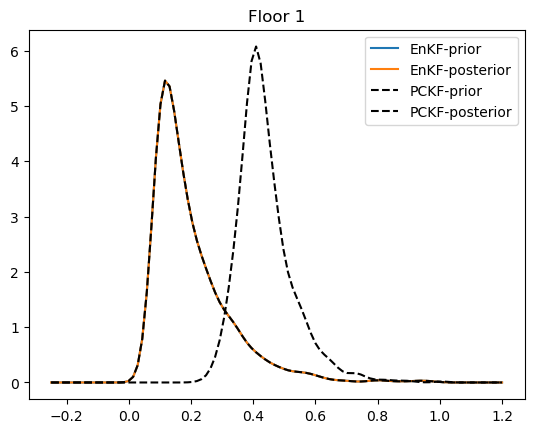

In [4]:


if(observed == 1):
    npzfile_prior = np.load('./enkf_prior_1data_nonlinear.npz')
    npzfile_posterior = np.load('./enkf_prior_1data_nonlinear.npz')
else:
    npzfile_prior = np.load('./enkf_prior_2data_nonlinear.npz')
    npzfile_posterior = np.load('./enkf_prior_2data_nonlinear.npz')


print(npzfile_prior)

print(npzfile_posterior)

plt.figure(1)
plt.title("Floor 1")
plt.plot(x1,npzfile_prior['x'],label = 'EnKF-prior')
plt.plot(x1,npzfile_posterior['x'],label = 'EnKF-posterior')
plt.plot(x1,kde_floor1,'k--',label = 'PCKF-prior')
plt.plot(x1,kde_floor1_up,'k--',label = 'PCKF-posterior')
# plt.axvline(dk[0,0], color='red', linestyle='--', label='data point- floor 1')
plt.legend()
plt.savefig('PCKF_floor1_1data_nonlinear.pdf')
plt.show()